In [13]:
from _util import *
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

import _analyzer as analyzer

reload(analyzer)
from matplotlib.transforms import BlendedGenericTransform
import matplotlib.gridspec as gridspec

# import shutil
# shutil.rmtree("res/0316") /
# shutil.rmtree("fig/0327") 
# !tar -czf fig.tar.gz fig/0429/_N50_T100_K5_p10_sigma2

In [ ]:
# unzip("res/robust_res.zip")

## Gaussian; together

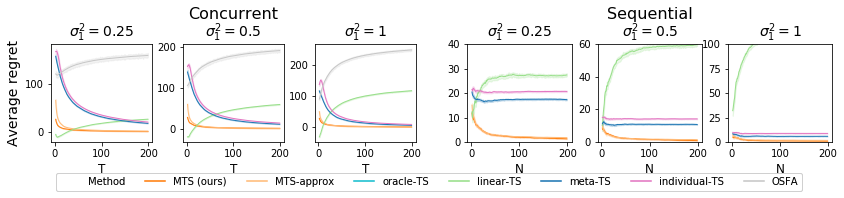

In [25]:
fig = plt.figure(figsize=(14, 1.8))
outer = gridspec.GridSpec(1, 2, wspace=0.14)
###################################
var = [0.25, 0.5, 1] # , 0.1 # , 1
hue_order = ["MTB", "MTB-approx", "oracle-TS", "linear-TS", "meta-TS", "individual-TS", "OSFA"]
skip_methods = []
# plot_which = "BR"
plot_which = "MTR"

if plot_which == "MTR":
    y_mins = [0, 0, 0]
    y_maxs = [40, 60, 100]
else:
    y_mins = [20, 20, 20]
    y_maxs = [55, 100, 100]
palette_idx = {'OSFA' : 14, 'MTB' : 1, "MTB-approx" : 2,'individual-TS' : 11, 'oracle-TS' : 17, 'linear-TS' : 4, 'meta-TS' : 0}
pp = "res/main_Gaussian/GLB_freqauto_MTS_freq2_Sigma_x_factor1_Sigma_theta_factor1_order{}_sigma1_square{}final_Gaussian"
###################################
reload(analyzer)
axs = []
###################################
for i in range(2):
    o = ['concurrent', 'episodic'][i]
    title_pre = ['Concurrent', 'Sequential'][i]
    if i == 0:
        inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                        subplot_spec=outer[i], wspace=0.3)
    else:
        inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                        subplot_spec=outer[i], wspace=0.25)
    ax = plt.Subplot(fig, outer[i])
    ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
    ax.axis('off')
    fig.add_subplot(ax)
    for j in range(3):
        v = var[j]
        p = pp.format(o, v)
        r = load(p)
        ana = analyzer.Analyzer()
        ana.recover_full_recorder(r)
        if i == 1:
            y_min = y_mins[j]
            y_max = y_maxs[j]
        else:
            y_max = y_min = None
        ax = plt.Subplot(fig, inner[j])
        handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = skip_methods 
#                     , ci = None
                    , ci = 68
                    , ax1 = ax, i = i + j
                    , linewidth = 1, y_max = y_max, y_min = y_min
                    , w_title = True, new_title = r'$\sigma_1^2 = {}$'.format(v) 
                    , palette_idx = palette_idx, hue_order = hue_order
                      , complex_x_label = False
               )
        labels[labels.index("MTB")] = "MTTS (ours)"
        labels[labels.index("MTB-approx")] = "MTTS-approx"
        fig.add_subplot(ax)
        axs.append(ax)

    ax.legend(handles, labels, loc='lower center', ncol = len(labels)
#             , bbox_to_anchor = [1.2, -0.6] # location # 0.4 for my plot
              , bbox_to_anchor = [0.5, -0.55]
            , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
                   )
fig.show()
###########
if plot_which == "MTR":
    fig.savefig("fig/Gaussian_all_6_MTR" + ".png"
                   , bbox_inches= "tight", dpi = 200)
else:
    fig.savefig("fig/Gaussian_all_6" + ".png"
                   , bbox_inches= "tight", dpi = 200)


## Report that number

In [ ]:
for v in [0.1, 0.25, 0.5, 1]:
    o = "concurrent"
    p = pp.format(o, v)
    r = load(p)
    ana = analyzer.Analyzer()
    ana.recover_full_recorder(r)
    a = ana.record_R_only['record']['data_plot_BR_original']
    aa = a[a.method == "MTB"]
    bb = a[a.method == "individual-TS"]
    c = (mean(aa[aa.time == list(aa.time)[-1]].regret) / mean(bb[bb.time == list(bb.time)[-1]].regret)) * 100
    print("only {:.2f} %".format(c))

## Binary; together

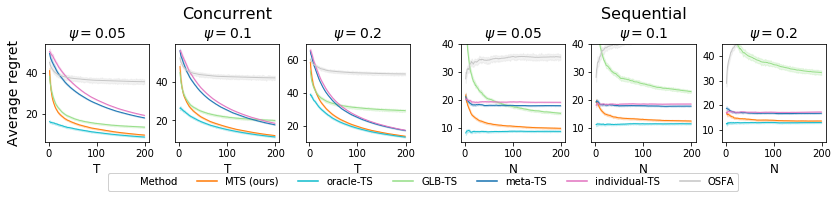

In [29]:
fig = plt.figure(figsize=(14, 1.8))
outer = gridspec.GridSpec(1, 2, wspace=0.14)
# fig = plt.figure(figsize=(14, 2))
# outer = gridspec.GridSpec(1, 2, wspace=0.15, hspace=0.2)
###################################
plot_which = "BR"

if plot_which == "MTR":
    y_mins = [0, 0, 0]
    y_maxs = [40, 60, 100]
else:
    y_mins = [5, 5, 5]
    y_maxs = [40, 40, 45]

var = [0.05, 0.1, 0.2]
hue_order = ["MTB",  "oracle-TS", "GLB-TS", "meta-TS", "individual-TS", "OSFA"]
skip_methods = []
palette_idx = {'OSFA' : 14, 'MTB' : 1, 'individual-TS' : 11, 'oracle-TS' : 17, 'GLB-TS' : 4, 'meta-TS' : 0}
pp = "res/main_Binary/binaryGLB_freqauto_MTS_freq2_Sigma_x_factor1_Sigma_theta_factor1_order{}_phi_beta{}"
###################################
reload(analyzer)
axs = []
###################################
for i in range(2):
    o = ['concurrent', 'episodic'][i]
    title_pre = ['Concurrent', 'Sequential'][i]
    
    inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                    subplot_spec=outer[i], wspace=0.25)
    ax = plt.Subplot(fig, outer[i])
    ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
    ax.axis('off')
    fig.add_subplot(ax)
    for j in range(3):
        v = var[j]
        p = pp.format(o, v)
        r = load(p)
        ana = analyzer.Analyzer()
        ana.recover_full_recorder(r)
        if i == 1:
            y_min = y_mins[j]
            y_max = y_maxs[j]
        else:
            y_max = y_min = None
        ax = plt.Subplot(fig, inner[j])
        handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = skip_methods 
#                     , ci = None
                    , ci = 68
                    , ax1 = ax, i = i + j
                    , linewidth = 1, y_max = y_max, y_min = y_min
                    , w_title = True, new_title = r'$\psi = {}$'.format(v)  # \phi
                    , palette_idx = palette_idx, hue_order = hue_order
                      , complex_x_label = False
               )
        labels[labels.index("MTB")] = "MTTS (ours)"
    #     labels[labels.index("MTB-approx")] = "MTTS-approx"
        fig.add_subplot(ax)
        axs.append(ax)

    ax.legend(handles, labels, loc='lower center', ncol = len(labels)
#             , bbox_to_anchor = [1.2, -0.6] # location # 0.4 for my plot
              , bbox_to_anchor = [0.5, -0.55]
            , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
                   )
fig.show()
###########
# fig.savefig("fig/binary_all_6" + ".png"
#                    , bbox_inches= "tight", dpi = 200)
###########
if plot_which == "MTR":
    fig.savefig("fig/binary_all_6_MTR" + ".png"
                   , bbox_inches= "tight", dpi = 200)
else:
    fig.savefig("fig/binary_all_6" + ".png"
                   , bbox_inches= "tight", dpi = 200)


## Robustness

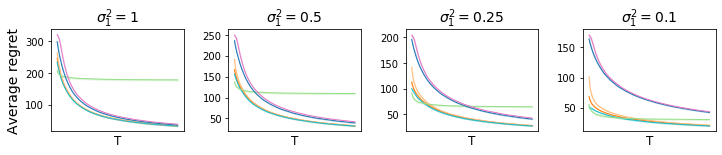

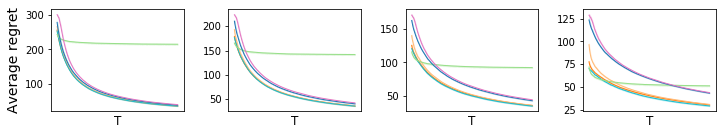

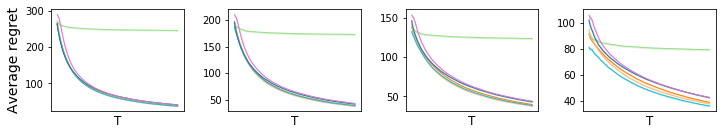

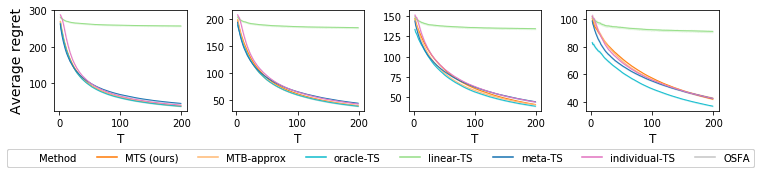

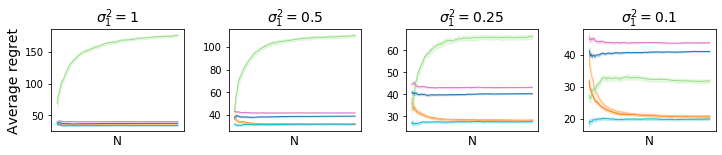

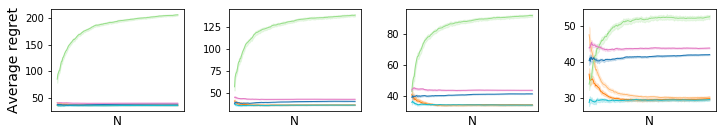

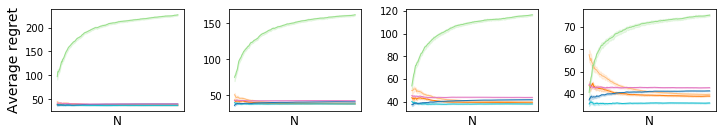

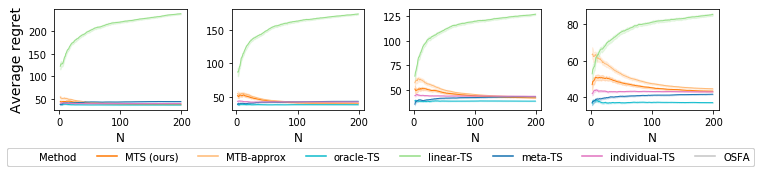

In [29]:
var = [1, 0.5, 0.25, 0.1] # 10, 5, 2, 
sigmas = [1] # 0.5, 1, 2
sigma = 1
misspecifications = [("cos", [3/4, 1/4])
                     , ("cos", [2/4, 2/4])
                     , ("cos", [1/4, 3/4])
                     , ("cos", [0, 1])
                     ]
hue_order = ["MTB", "MTB-approx", "oracle-TS", "linear-TS", "meta-TS", "individual-TS", "OSFA"]
palette_idx = {'OSFA' : 14, 'MTB' : 1, "MTB-approx" : 2,'individual-TS' : 11, 'oracle-TS' : 17, 'linear-TS' : 4, 'meta-TS' : 0}

for task_order in ["concurrent", "episodic"]:
    for jj, misspecification in enumerate(misspecifications):
        save_prefix = "mis_{}_{}_{}".format(misspecification[0], misspecification[1][0], misspecification[1][1])
        # var = [0.25, 0.5, 1]
        fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 2))
        fig.tight_layout() 
        for i, ax in enumerate(axs):
            reload(analyzer)
            v = var[i]
            try:
                p = "res/robust_res/MTS_freq2_Sigma_x_factor1_Sigma_theta_factor1_order{}_sigma1_square{}".format(task_order, v) + save_prefix
                r = load(p)
            except:
                try:
                    p = "res/robust_res/MTS_freq2_Sigma_x_factor1_Sigma_theta_factor1_order{}_sigma1_square{}-".format(task_order, v) + save_prefix
                    r = load(p)
                except:
                    p = "res/robust_res/sigma1_square{}_order{}_Sigma_theta_factor1_Sigma_x_factor1_MTS_freq2_GLB_freqauto".format(v, task_order) + save_prefix
                    r = load(p)
            ana = analyzer.Analyzer()
            ana.recover_full_recorder(r, only_plot_matrix = True)
            skip_methods = ["OSFA"]
            if task_order == "concurrent":
                title_pre = "Concurrent"
            else:
                title_pre = "Sequential"
            if jj == 0:
                w_title = True
            else:
                w_title = False
            if jj == 3:
                no_xtick = False
            else:
                no_xtick = True
            handles, labels = ana.plot_regret(plot_which = "BR"
                    , plot_mean = True
                    , skip_methods = skip_methods # "OSFA"
                        , ci = 68
                        , w_title = w_title, no_xtick = no_xtick
                        , ax1 = ax, i = i
                        , linewidth = 1
                        , new_title = r'$\sigma_1^2 = {}$'.format(v) 
                        , hue_order = hue_order
                        , palette_idx = palette_idx
                      , complex_x_label = False

                   )
            labels[labels.index("MTB")] = "MTS (ours)"
        #     labels[labels.index("MTS-approx")] = "MTS (approx)"
#             order = [1,2, 4,5,6,3,0]
#             labels = [labels[i] for i in order]
#             handles = [handles[i] for i in order]
            
            if jj == 3:
                ax.legend(handles, labels, loc='lower center', ncol = len(labels)
                        , bbox_to_anchor = [0.5, -0.6] # location
                        , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
                               )
            fig.savefig("fig/mis/" + save_prefix + "_" + task_order + ".png"
                                          , bbox_inches= "tight", dpi = 200)


## Gaussian; Appendix
K, p, N, $\sigma$

In [ ]:
1

In [ ]:
1

<Figure size 1008x144 with 0 Axes>

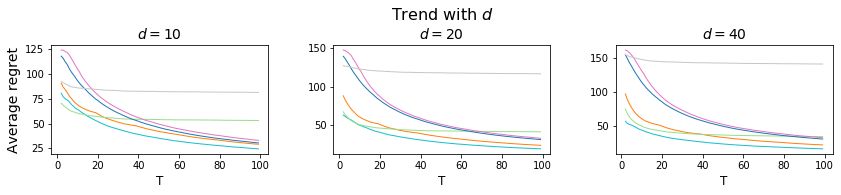

<Figure size 1008x144 with 0 Axes>

<Figure size 1008x144 with 0 Axes>

<Figure size 1008x144 with 0 Axes>

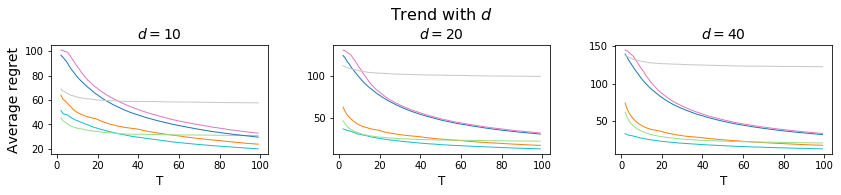

<Figure size 1008x144 with 0 Axes>

<Figure size 1008x144 with 0 Axes>

In [12]:
###################################
for sigma1 in [0.5, 0.25]:
    for exp in range(4):
        ## sigma
        fig = plt.figure(figsize=(14, 2))
        outer = gridspec.GridSpec(1, 1, wspace=0.15, hspace=0.2)
        if exp == 0:
            pp = "res/0520/Gaussian/_N100_T100_K8_p15/MTS_freq20_order{}_sigma{}_sigma1_square{}-more_Gaussian"
            var = [0.3, 1, 3] # , 0.1 # , 1
            title_pre = "Trend with " + r"$\sigma$"
            save_name = "trend_sigma"
            trend_v = r"$\sigma$"
            with_legend = False

        ## p
        if exp == 1:
            pp = "res/0520/Gaussian/_N100_T100_K8_sigma1/MTS_freq20_order{}_p{}_sigma1_square{}-more_Gaussian"
            var = [10, 20, 40] # , 0.1 # , 1
            title_pre = "Trend with " + r"$d$"
            save_name = "trend_d"
            trend_v = r"$d$"
            with_legend = False

        ## K
        if exp == 2:
            pp = "res/0520/Gaussian/_N100_T100_p15_sigma1/MTS_freq20_order{}_K{}_sigma1_square{}-more_Gaussian"
            var = [3, 6, 12] # , 0.1 # , 1
            title_pre = "Trend with " + r"$K$"
            save_name = "trend_K"
            trend_v = r"$K$"
            with_legend = False

        ## N
        if exp == 3:

            pp = "res/0520/Gaussian/_T100_K8_p15_sigma1/MTS_freq20_order{}_sigma1_square{}_N{}-more_Gaussian"
            var = [20, 50, 300] # , 0.1 # , 1
            title_pre = "Trend with " + r"$N$"
            save_name = "trend_N"
            trend_v = r"$N$"
            with_legend = True

        ###################################
        hue_order = ["MTB", "oracle-TS", "linear-TS", "meta-TS", "individual-TS", "OSFA"]
        skip_methods = []
        # plot_which = "BR"
        plot_which = "BR"

        if plot_which == "MTR":
            y_mins = [0, 0, 0]
            y_maxs = [40, 60, 100]
        else:
            y_mins = [20, 20, 20]
            y_maxs = [55, 100, 100]
        palette_idx = {'OSFA' : 14, 'MTB' : 1, "MTB-approx" : 2,'individual-TS' : 11, 'oracle-TS' : 17, 'linear-TS' : 4, 'meta-TS' : 0}
        ###################################
        reload(analyzer)
        axs = []
        ###################################
        i = 0
        o = ['concurrent', 'episodic'][i]
        # title_pre = ['Concurrent', 'Sequential'][i]

        inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                        subplot_spec=outer[i], wspace=0.3, hspace=0.1)
        ax = plt.Subplot(fig, outer[i])
        ax.set_title(title_pre, pad = 25, size = 16, fontweight= 550)
        ax.axis('off')
        fig.add_subplot(ax)
        for j in range(3):
            v = var[j]
            if exp == 3:
                p = pp.format(o, sigma1, v)
            else:
                p = pp.format(o, v, sigma1)
            r = load(p)
            ana = analyzer.Analyzer()
            ana.recover_full_recorder(r)
            if i == 1:
                y_min = y_mins[j]
                y_max = y_maxs[j]
            else:
                y_max = y_min = None
            ax = plt.Subplot(fig, inner[j])
            handles, labels = ana.plot_regret(plot_which = plot_which, plot_mean = True, skip_methods = skip_methods 
                            , ci = None
    #                     , ci = 68
                        , ax1 = ax, i = i + j
                        , linewidth = 1, y_max = y_max, y_min = y_min
                        , w_title = True, new_title = trend_v + r'$ = {}$'.format(v) 
                        , palette_idx = palette_idx, hue_order = hue_order
                          , complex_x_label = False
                   )
            labels[labels.index("MTB")] = "MTS (ours)"
        #     labels[labels.index("MTB-approx")] = "MTS-approx"
            fig.add_subplot(ax)
            axs.append(ax)
        if with_legend:
            ax.legend(handles, labels, loc='lower center', ncol = len(labels)
        #             , bbox_to_anchor = [1.2, -0.6] # location # 0.4 for my plot
                  , bbox_to_anchor = [0.5, -0.55]
                , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
                       )
        fig.show()
        ###########
        # if plot_which == "MTR":
        #     fig.savefig("fig/Gaussian_all_6_MTR" + ".png"
        #                    , bbox_inches= "tight", dpi = 200)
        # else:
        #     fig.savefig("fig/Gaussian_all_6" + ".png"
        #                    , bbox_inches= "tight", dpi = 200)
        fig.savefig("fig/" + "trend/" + save_name + str(sigma1) + ".png"
                       , bbox_inches= "tight", dpi = 200)
